In [1]:
import pandas as pd
df_metadata = pd.read_csv(r'C:\Users\MegaTecnologia\Desktop\DesafioTelecom\Data\metadata.csv',
                      sep=";")

Nulls management

In [2]:
#El problema de los nulls está muy marcado por columnas
df_metadata["episode_title"].fillna(-1, inplace = True)
df_metadata["content_id"].fillna(-1, inplace = True)
df_metadata["show_type"].fillna(-1, inplace = True)
df_metadata["country_of_origin"].fillna(-1, inplace = True)
df_metadata["keywords"].fillna(df_metadata['category'], inplace = True)
df_metadata["keywords"].replace(to_replace="/", value = ",", inplace = True)
#Como no existen descripciones reducidas nulas, la idea sería tmb autocompletar ese campo
df_metadata["description"].fillna(-1, inplace = True)
#Este se podría por media con igual asset
df_metadata["cast_first_name"].fillna("No disponible", inplace = True)
df_metadata["credits_first_name"].fillna("No disponible", inplace = True)
#Ver de llenarlo con General o el más común
df_metadata["audience"].fillna("General", inplace = True)

Useless data

In [3]:
#Se va el campo título que no necesitamos
#df_metadata = df_metadata.drop('title', axis=1)
df_metadata = df_metadata.drop('reduced_title', axis=1)
df_metadata = df_metadata.drop('episode_title', axis=1)

In [4]:
#Voy a sacar por ahora los datos de fecha porque no les veo utilidad
df_metadata = df_metadata.drop('create_date', axis=1)
df_metadata = df_metadata.drop('modify_date', axis=1)
df_metadata = df_metadata.drop('start_vod_date', axis=1)
df_metadata = df_metadata.drop('end_vod_date', axis=1)

In [5]:
#También las descripciones por ahora
df_metadata = df_metadata.drop('description', axis=1)
df_metadata = df_metadata.drop('reduced_desc', axis=1)

<AxesSubplot:xlabel='credits_first_name', ylabel='count'>

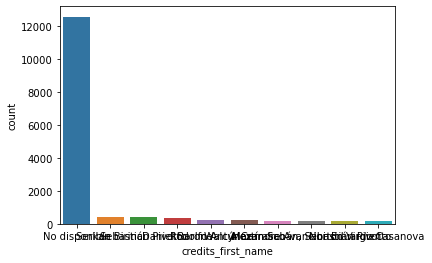

In [6]:
#Directores con más contenido
import seaborn as sns

sns.countplot(x='credits_first_name', data=df_metadata,
             order=df_metadata.credits_first_name.value_counts().iloc[:10].index)

<AxesSubplot:xlabel='count', ylabel='credits_first_name'>

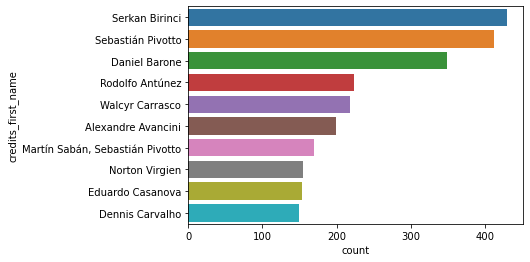

In [7]:
#Como no disponible, vemos la incidencia de los otros
sns.countplot(y='credits_first_name', data=df_metadata,
              orient = "h",
             order=df_metadata.credits_first_name.value_counts().iloc[1:11].index)

In [8]:
#Por el momento, decidimos que no tiene incidencia relevante y lo volamos
df_metadata = df_metadata.drop('credits_first_name', axis=1)

Category agrup

<AxesSubplot:xlabel='count', ylabel='audience'>

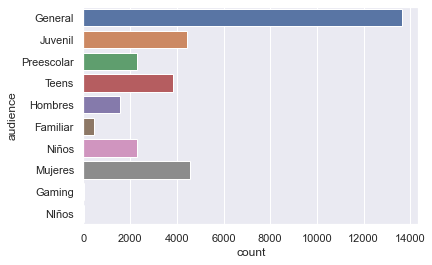

In [9]:
#Audience distribution
sns.set_theme(style="darkgrid")
sns.countplot(y='audience', data=df_metadata)

In [10]:
#Vamos a hacer un agrupamiento de la audiencia solo por edad
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Preescolar", value="Juvenil")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Teens", value="Juvenil")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Hombres", value="General")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Familiar", value="General")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Mujeres", value="General")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="Gaming", value="Juvenil")
df_metadata['audience'] = df_metadata['audience'].replace(to_replace="NIños", value="Niños")

<AxesSubplot:xlabel='count', ylabel='show_type'>

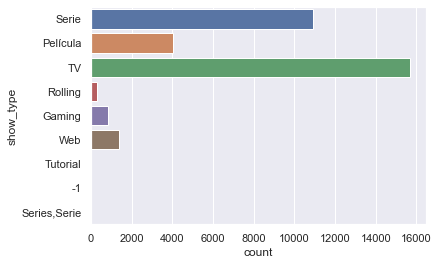

In [11]:
sns.countplot(y='show_type', data=df_metadata)

<AxesSubplot:xlabel='count', ylabel='show_type'>

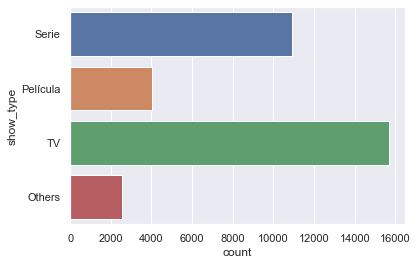

In [12]:
otros = ['Rolling', 'Gaming', 'Web', 'Tutorial', -1]
df_metadata['show_type'] = df_metadata['show_type'].replace(to_replace=otros, value="Others")
df_metadata['show_type'] = df_metadata['show_type'].replace(to_replace="Series,Serie", value="Serie")
sns.countplot(y='show_type', data=df_metadata)

In [13]:
#By business reqirements, show type "Others" is not necesary because contains product tutorials
without_tutorials = df_metadata['show_type'] != "Others"
df_metadata = df_metadata[without_tutorials]

<AxesSubplot:xlabel='country_of_origin', ylabel='count'>

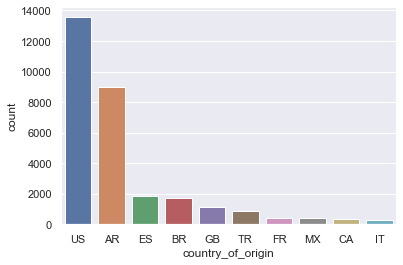

In [14]:
sns.countplot(x='country_of_origin', data=df_metadata,
             order=df_metadata.country_of_origin.value_counts().iloc[:10].index)

top = ['US', 'AR', 'ES', 'BR', 'GB', 'TR', 'FR']
mask = ~extend_df['country_of_origin'].isin(top)
extend_df.loc[mask, 'country_of_origin'] = 'Others'

Cast

In [15]:
#Como content es un id, voy a llevarlo a tipo entero
df_metadata['content_id'] = df_metadata['content_id'].astype('int32')
df_metadata['released_year'] = df_metadata['released_year'].astype('int32')
df_metadata['run_time_min'] = df_metadata['run_time_min'].astype('int32')

Data Explore

In [16]:
df_metadata.head()

,asset_id,content_id,title,show_type,released_year,country_of_origin,category,keywords,cast_first_name,run_time_min,...,made_for_tv,close_caption,sex_rating,violence_rating,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2
0,15188,0,Ep:17 Tiempos Compulsivos,Serie,2012,AR,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...","Rodrigo De la Serna, Paola Krum, Fernán Mirás,...",48,...,N,N,N,N,N,N,N,N,N,N
1,24940,1,7 Cajas,Película,2012,PY,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas","Celso Franco, Víctor Sosa, Lali Gonzalez",105,...,N,N,N,N,N,N,N,Y,N,N
2,21939,2,La Maldición de las Hormigas Gigantes,Película,2016,FI,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...","Mark Arnold, Harry Lister Smith, Vanessa Grass...",82,...,Y,N,N,N,N,N,N,N,N,N
3,9005,3,Una Mujer Fantástica,Película,2017,CL,Drama,"LGBT,Mujeres,Latinoamérica","Daniela Vega, Francisco Reyes, Luis Gnecco, Am...",99,...,N,N,N,N,N,N,N,N,Y,N
4,7391,4,Star Trek,Película,2009,US,Ciencia Ficción/Aventura,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas","Chris Pine, Zachary Quinto, Leonard Nimoy, Eri...",126,...,N,N,N,N,N,N,N,Y,N,N


In [17]:
df_metadata.describe()

,asset_id,content_id,released_year,run_time_min
count,30614.000000,30614.000000,30614.000000,30614.000000
mean,16568.669008,1423.962207,2015.794016,50.242275
std,9565.058727,1148.862869,6.207407,35.114304
min,0.000000,0.000000,1942.000000,0.000000
25%,8299.250000,396.000000,2015.000000,23.000000
50%,16587.500000,1134.000000,2018.000000,44.000000
75%,24844.750000,2174.000000,2019.000000,71.000000
max,33143.000000,4371.000000,2021.000000,308.000000


NLP ETL

In [18]:
import re
def char_to_space(delimiter, text):
    text = re.sub(delimiter, ' ', text)
    return text

In [19]:
df_metadata['category'] = [char_to_space('/',row) for row in df_metadata['category']]
df_metadata['keywords'] = [char_to_space(',',row) for row in df_metadata['keywords']]
df_metadata['cast_first_name'] = [char_to_space(',',row) for row in df_metadata['cast_first_name']]

In [20]:
sub_df = df_metadata[['content_id','title','show_type', 'released_year', 'country_of_origin',
                      'category','keywords','cast_first_name','audience']]
sub_df

,content_id,title,show_type,released_year,country_of_origin,category,keywords,cast_first_name,audience
0,0,Ep:17 Tiempos Compulsivos,Serie,2012,AR,Drama,Trastornos Médicos Tragicómica Telenovela Enfe...,Rodrigo De la Serna Paola Krum Fernán Mirás ...,General
1,1,7 Cajas,Película,2012,PY,Suspenso Acción,Latinoamérica Pobreza Crimen Pandillas,Celso Franco Víctor Sosa Lali Gonzalez,General
2,2,La Maldición de las Hormigas Gigantes,Película,2016,FI,Terror Comedia,Criaturas Plagas Adolescentes Fantasía Video J...,Mark Arnold Harry Lister Smith Vanessa Grass...,Juvenil
3,3,Una Mujer Fantástica,Película,2017,CL,Drama,LGBT Mujeres Latinoamérica,Daniela Vega Francisco Reyes Luis Gnecco Am...,General
4,4,Star Trek,Película,2009,US,Ciencia Ficción Aventura,Fantasía Galaxia Futurismo Aliens Criaturas,Chris Pine Zachary Quinto Leonard Nimoy Eri...,General
...,...,...,...,...,...,...,...,...,...
33139,1979,T:1 Ep:03 Allen V. Farrow,Serie,2021,US,Drama Documental,Abusos Familia Juicio Hechos Reales Miniserie,Mia Farrow Woody Allen Dylan Farrow Ronan F...,General
33140,1979,T:1 Ep:01 Allen V. Farrow,Serie,2021,US,Drama Documental,Abusos Familia Juicio Hechos Reales Miniserie,Mia Farrow Woody Allen Dylan Farrow Ronan F...,General
33141,943,T:2 Ep:34 Programa De Talentos,TV,2011,US,Infantil Comedia,Instituto Amigos Música,Gülru arruinó el nuevo diseño de Gulfem.,Juvenil
33142,1957,T:2 Ep:05 Batwoman,Serie,2021,US,Acción Aventura,DC Comics Superhéroes Mujeres Comics,Javicia Leslie Rachel Skarsten Meagan Tandy ...,General


In [21]:
#Engineer feature to released_year
import numpy as np

sub_df['old_categ'] = np.where(
    sub_df['released_year'] == 2021, "New",
        np.where(
            sub_df['released_year'] > 2017, "Actual",
                np.where(
                    sub_df['released_year'] > 2000, "This mil", "Old mil"))
    )

<ipython-input-21-0fdde82f190e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['old_categ'] = np.where(


In [22]:
sub_df['show_type'] = sub_df['show_type'].map(str)
sub_df['country_of_origin'] = sub_df['country_of_origin'].map(str)

<ipython-input-22-fe1551de265e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['show_type'] = sub_df['show_type'].map(str)
<ipython-input-22-fe1551de265e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['country_of_origin'] = sub_df['country_of_origin'].map(str)


In [23]:
def combine_features(row):
    return row['show_type']+" "+row['old_categ']+" "+row['country_of_origin']+" "+row['category']+" "+row['keywords']+" "+row['cast_first_name']+" "+row['audience']

In [24]:
summary = pd.DataFrame()
summary['content_id'] = sub_df['content_id']
summary['combined_features'] = sub_df.apply(combine_features,axis=1)
summary

,content_id,combined_features
0,0,Serie This mil AR Drama Trastornos Médicos Tra...
1,1,Película This mil PY Suspenso Acción Latinoamé...
2,2,Película This mil FI Terror Comedia Criaturas ...
3,3,Película This mil CL Drama LGBT Mujeres Latino...
4,4,Película This mil US Ciencia Ficción Aventura ...
...,...,...
33139,1979,Serie New US Drama Documental Abusos Familia J...
33140,1979,Serie New US Drama Documental Abusos Familia J...
33141,943,TV This mil US Infantil Comedia Instituto Amig...
33142,1957,Serie New US Acción Aventura DC Comics Superhé...


In [25]:
def text_to_minus(text):
    return text.lower()

In [26]:
import re
def remove_caracters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

In [27]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = text.encode("utf-8",'ignore')
    return text.decode('ascii')

In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MegaTecnologia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def remove_stopwords(text):
    word_tokens = text.split()
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_text = ' '.join(filtered_sentence)
    return filtered_text

In [30]:
#Creo el pipeline
def text_etl (text, 
                 minus = True,
                 no_characters = True,
                 no_accents = True,
                 no_stopwords = True):
    
    if minus:
        text = text_to_minus(text)
    if no_characters:
        text = remove_caracters(text)
    if no_accents:
        text = remove_accented_chars(text)
    if no_stopwords:
        text = remove_stopwords(text)
    
    return text

In [31]:
process_summary = summary.copy().reset_index(drop=True)
process_summary['combined_features'] = [text_etl(row) for row in process_summary['combined_features']]

In [32]:
process_summary

,content_id,combined_features
0,0,serie this mil ar drama trastornos mdicos trag...
1,1,pelcula this mil py suspenso accin latinoamric...
2,2,pelcula this mil fi terror comedia criaturas p...
3,3,pelcula this mil cl drama lgbt mujeres latinoa...
4,4,pelcula this mil us ciencia ficcin aventura fa...
...,...,...
30609,1979,serie new us drama documental abusos familia j...
30610,1979,serie new us drama documental abusos familia j...
30611,943,tv this mil us infantil comedia instituto amig...
30612,1957,serie new us accin aventura dc comics superhro...


Vocabulary generation

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(summary['combined_features'])
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Similarity model (cosine)

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix)

cosine_sim.shape

(30614, 30614)

In [35]:
#media_example = 4 #Start Trek
media_example = 7 #Mirtha Legrand
movie_index = summary[summary['content_id'] == media_example].content_id.values[0]
similar_media = list(enumerate(cosine_sim[movie_index]))
similar_media

[(0, 0.16317848796612638),
 (1, 0.1345345587992625),
 (2, 0.0),
 (3, 0.1345345587992625),
 (4, 0.11566298639324805),
 (5, 0.06726727939963124),
 (6, 0.05913123959890826),
 (7, 0.9999999999999998),
 (8, 0.056613851707229795),
 (9, 0.07692307692307693),
 (10, 0.11322770341445959),
 (11, 0.0),
 (12, 0.11566298639324805),
 (13, 0.11322770341445959),
 (14, 0.11322770341445959),
 (15, 0.11566298639324805),
 (16, 0.11094003924504584),
 (17, 0.12104550653376049),
 (18, 0.16012815380508716),
 (19, 0.07161148740394328),
 (20, 0.07692307692307693),
 (21, 0.08006407690254358),
 (22, 0.1908854288927333),
 (23, 0.15384615384615385),
 (24, 0.11322770341445959),
 (25, 0.12725695259515554),
 (26, 0.12725695259515554),
 (27, 0.07692307692307693),
 (28, 0.3508232077228117),
 (29, 0.3508232077228117),
 (30, 0.3508232077228117),
 (31, 0.3508232077228117),
 (32, 0.3508232077228117),
 (33, 0.3508232077228117),
 (34, 0.3508232077228117),
 (35, 0.3508232077228117),
 (36, 0.3508232077228117),
 (37, 0.3508232077

In [36]:
sorted_similar = sorted(similar_media,key=lambda x:x[1],reverse=True)[1:]
sorted_similar = sorted_similar[0:20]
x = [p[0] for p in sorted_similar]
media_titles = sub_df[sub_df.index.isin(x)]
media_titles['title']

607                                      11/06 - Sportia
623                             T:2 Ep:62 Galaxia Wander
2444         T:1 Ep:12 Seguimos Educando 2do y 3er grado
2511         T:1 Ep:24 Seguimos Educando 4to y 5to grado
10593                              El infierno de Malone
11069                        09/14 - Mujeres de El Trece
11184                  T:17 Ep:09 El gran apetito de Guy
11199                               T:5 Ep:12 Gran diosa
11202                               T:5 Ep:03 Gran diosa
12079                                T:2 Ep:56 Vampirina
18692    T:1 Ep:01 Gravity Falls: Un verano de misterios
18745                            T:1 Ep:02 The Leftovers
18747                            T:1 Ep:04 The Leftovers
18818                       T:1 Ep:01 His Dark Materials
18819                            T:1 Ep:01 O doutrinador
18900                             T:1 Ep:02 El Internado
18901                             T:1 Ep:04 El Internado
19001              T:9 Ep:09 Am

Cross between asset and content

In [37]:
#Content & asset cross
cross_df = df_metadata[['content_id', 'asset_id']]

In [38]:
df_train = pd.read_csv(r"C:\Users\MegaTecnologia\Desktop\DesafioTelecom\Data\train_w_target.csv")

In [39]:
#Drop useless data
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_train.drop('customer_id', axis=1, inplace=True)
df_train.drop('device_type', axis=1, inplace=True)
#df_train.drop('tunein', axis=1, inplace=True)
df_train.drop('tuneout', axis=1, inplace=True)
df_train.drop('resume', axis=1, inplace=True)
df_train.drop('minVisualizados', axis=1, inplace=True)
df_train.drop('run_time_min', axis=1, inplace=True)
df_train

,account_id,asset_id,tunein,target
0,90627,18332,2021-02-18 22:52:00,1
1,3389,18332,2021-02-27 16:25:00,1
2,3395,18332,2021-02-24 17:24:00,1
3,26042,18332,2021-02-24 21:56:00,1
4,26060,18332,2021-02-19 15:10:00,0
...,...,...,...,...
3657745,25640,15863,2021-03-16 00:25:00,0
3657746,25640,15598,2021-03-26 01:11:00,1
3657747,25640,22513,2021-03-27 03:56:00,1
3657748,25777,24720,2021-02-05 11:54:00,0


In [40]:
#Filter only "like" media
train_filter = df_train[df_train['target'] == 1]

In [41]:
#Merge to change asset_id to content_id 
train_content =pd.merge(df_train,cross_df, how='inner',on ='asset_id')
train_content.drop('asset_id', axis=1, inplace=True)

Ranking de los más vistos

In [42]:
ranking = train_content.content_id.value_counts(sort=True)
ranking[0:20]

2040    172461
2160     88948
4133     71857
1139     67219
1316     51869
2012     51373
2942     43957
1462     42231
3900     39810
1983     35315
1800     34951
176      33591
3353     31276
712      29993
774      29024
3712     28008
729      27098
1020     27003
135      26248
2627     25809
Name: content_id, dtype: int64

Agrupar lo que vio cada usuario

In [43]:
#Filter last 15 content per user
def filter_by_user(df, user_account):
    user_df = df[df['account_id'] == user_account]
    user_df.sort_values(by='tunein')
    return list(user_df.content_id[0:15])

In [44]:
user = filter_by_user(train_content, 90627)
user

[2040, 2040]

Buscar similitudes para cada item

In [45]:
def cosine_similarity(media_id):
    all_recomend = []
    similar_media = list(enumerate(cosine_sim[media_id]))
    sorted_similar = sorted(similar_media,key=lambda x:x[1],reverse=True)[1:]
    sorted_similar = sorted_similar[0:20]
    for i in sorted_similar:
        all_recomend.append(i[0])
    return all_recomend

In [46]:
recomend = cosine_similarity(2040)
recomend

[1554,
 1556,
 1583,
 1592,
 1594,
 1604,
 1605,
 1613,
 1614,
 1633,
 1641,
 1642,
 1643,
 1654,
 1656,
 1657,
 1660,
 1664,
 1665,
 1667]

In [47]:
result = sub_df[sub_df['content_id'] == 1554]
result

,content_id,title,show_type,released_year,country_of_origin,category,keywords,cast_first_name,audience,old_categ
10270,1554,Prescripción por el peligro,Película,2018,CA,Drama Suspenso,Médicos,Shaun Benson Joanne Kelly Genelle Williams ...,General,Actual


In [48]:
#Create unique user list
users = df_train['account_id'].unique()
len(users)

113878

In [49]:
#Create unique items list
items = sub_df['content_id'].unique()
len(items)

4252

In [50]:
#Dataframe with recommendations per item
df_recommendations = pd.DataFrame()
df_recommendations['content_id'] = sub_df['content_id'].unique()
df_recommendations['recommedations'] = [cosine_similarity(row) 
                                        for row in df_recommendations['content_id']]
df_recommendations

,content_id,recommedations
0,0,"[227, 228, 229, 230, 231, 232, 233, 234, 235, ..."
1,1,"[2247, 23621, 19848, 11444, 26028, 17844, 1058..."
2,2,"[26950, 26951, 26953, 26954, 26955, 26956, 269..."
3,3,"[2387, 24770, 19317, 19318, 19321, 19322, 1932..."
4,4,"[5541, 2438, 24751, 10, 24, 2332, 24752, 2439,..."
...,...,...
4247,4367,"[4238, 4240, 4241, 4242, 4243, 4245, 4246, 424..."
4248,4368,"[9545, 27836, 4353, 21019, 4258, 11085, 22718,..."
4249,4369,"[4238, 4240, 4241, 4242, 4243, 4245, 4246, 424..."
4250,4370,"[4238, 4240, 4241, 4242, 4243, 4245, 4246, 424..."


In [52]:
df_recommendations.to_csv('recomedaciones_enviar.csv', header=False)

In [53]:
df_watch_users = pd.DataFrame()
df_watch_users['account_id'] = df_train['account_id'].unique()

watched = []
for row in df_watch_users['account_id']:
    watched.append(filter_by_user(train_content, row))

df_watch_users['watched'] = watched
df_watch_users

,account_id,watched
0,90627,"[2040, 2040]"
1,3389,"[2040, 2040, 2040, 2040, 3225, 1018, 3273, 327..."
2,3395,"[2040, 2040, 2040, 2040, 2040, 2040, 2040]"
3,26042,"[2040, 2040, 2040, 2040, 657, 657, 657, 2190, ..."
4,26060,"[2040, 2040, 2040, 2040, 2040, 2040, 3806, 376..."
...,...,...
113873,104988,[917]
113874,8759,[915]
113875,106698,[66]
113876,38301,[140]


In [55]:
df_watch_users['unique_watched'] = [list(set(row))
                                        for row in df_watch_users['watched']]
df_watch_users.drop('watched', axis=1, inplace=True)
df_watch_users

,account_id,unique_watched
0,90627,[2040]
1,3389,"[3208, 3273, 3578, 2040, 3225, 1018]"
2,3395,[2040]
3,26042,"[2040, 657, 2190, 2817]"
4,26060,"[2246, 3087, 3767, 2040, 89, 3806]"
...,...,...
113873,104988,[917]
113874,8759,[915]
113875,106698,[66]
113876,38301,[140]


In [58]:
df_watch_users.to_csv('user_watched_list.csv')

In [57]:
valid_recommendatios = []
for row in df_watch_users['unique_watched']:
    for i in row:
        
    

3208